# MAE3405 Workshop 12

Dr Daniel Duke
Department of Mechanical & Aerospace Engineering
Monash University

### H$_2$ - O$_2$ Rocket

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib widget

In [2]:
# moles of H2 in rich reactions
def n_H2_rich(psi,x=0,y=0):
    return (8./psi - 1)*(psi<=8)
    #return (8./psi - 1-x-y)*(psi<=8)

# moles of O2 in lean reactions
def m_O2_lean(psi,x=0,y=0):
    #return (psi>8)*(((2+y)*psi/16.)-1-x-y)/2.
    return (psi>8)*(((2)*psi/16.)-1)/2.

# Heat of reaction, MJ/kmol H2O
def Hc(x=0,y=0):
    return 241.83 - 249*x + 230*y 

# Norm molar weight of products [kgP/kmol P]
# Used for products calculations
def MwtP(psi,x=0,y=0):
    n = n_H2_rich(psi,x,y)
    m = m_O2_lean(psi,x,y)
    return (18 + 2*n + 32*m + 16*x + 17*y)/(1+n+m+x+y)

# Heat release from combustion [kJ/kgP]
def qH(psi,x=0,y=0):
    # Since Hc is per kmol H2O we need molar mass per kmol H2O:
    n = n_H2_rich(psi,x,y)
    m = m_O2_lean(psi,x,y)
    Mwt_per_mol_H2O= 18 + 2*n + 32*m + 16*x + 17*y
    #Mwt_per_mol_H2O/=(1+n+m+x+y)
    return 1e3*Hc(x,y)/Mwt_per_mol_H2O

# Specific heat capacity of the products, based on an assumed gamma (not weighted sum)
def CpP(psi,x=0,y=0,gamma=1.15): 
    Mw = MwtP(psi,x,y) # kgP/kmol H2O
    return (gamma*8.314)/((gamma-1)*Mw) # kJ/kg.K

In [3]:
# Products temperature from 1st law
def TP(psi,x=0,y=0,gamma=1.15,Tf=250,To=90,eta_b=1.):
    
    T0=298. # K
    CpOx=1.71 # kJ/kg.K
    CpF=14.05 # kJ/kg.K
    hfg_Ox = 213 # kJ/kg

    q_b=qH(psi,x,y)
    cp=CpP(psi,x,y,gamma)

    react_sens = CpF*(Tf-T0)/(psi+1) + psi*CpOx*(To-T0)/(psi+1) # kJ/kgP
    latent = psi*hfg_Ox/(psi+1)
    
    return 298 + (q_b*eta_b + react_sens - latent)/cp

In [4]:
# Nozzle velocity
def Cj(psi,x=0,y=0,gamma=1.15,pe=101325,pc=250e5):
    cp = CpP(psi,x,y,gamma)
    T = TP(psi,x,y,gamma)
    expansion = 1 - (pe/pc)**((gamma-1)/gamma)
    return np.sqrt(2000*cp*T*expansion)

# Specific Impulse
def Isp(psi,x=0,y=0,gamma=1.15,pe=101325,pc=250e5):
    return Cj(psi,x,y,gamma,pe,pc)/9.81

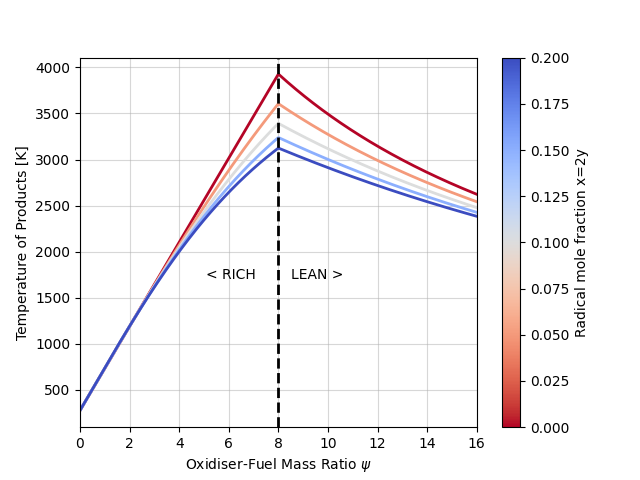

In [6]:
x_asymp=0.2
psi_v = np.linspace(1e-3,16,512)
cmap='coolwarm_r'
def cfun(x):
    return mpl.colormaps[cmap](x/x_asymp)

fig=plt.figure()
for x in np.linspace(0,x_asymp,5):
    xpr = TP(psi_v,x,x)*x/TP(8,0,0)
    plt.plot(psi_v,TP(psi_v,xpr,xpr*2),c=cfun(x),lw=2)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=x_asymp))
cb = plt.colorbar(sm,ax=plt.gca())
cb.set_label('Radical mole fraction x=2y')

plt.axvline(8,lw=2,c='k',ls='--')
plt.grid(alpha=.5)
plt.xlabel(r'Oxidiser-Fuel Mass Ratio $\psi$');
plt.ylabel('Temperature of Products [K]');
plt.text(5.1,1700,"< RICH");
plt.text(8.5,1700,"LEAN >");
plt.xlim(0,16);
plt.savefig('MAE3405_wk12_fig1.png');

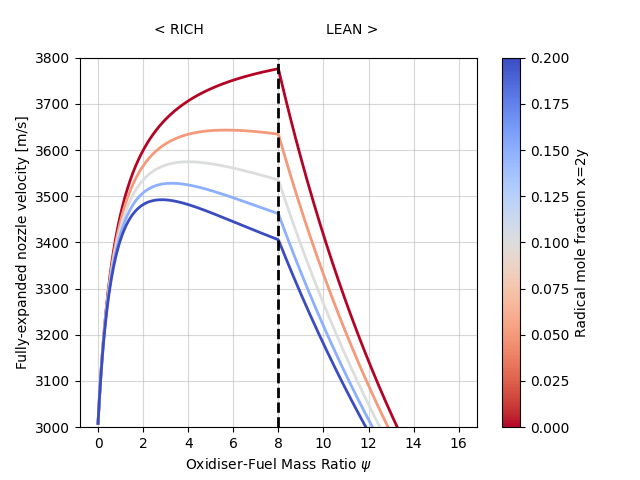

In [9]:
fig=plt.figure()
for x in np.linspace(0,x_asymp,5):
    xpr = TP(psi_v,x,x)*x/TP(8,0,0)
    plt.plot(psi_v,Cj(psi_v,xpr,2*xpr),label='x=y=%.02f' % x,c=cfun(x),lw=2)
plt.axvline(8,lw=2,c='k',ls='--')

plt.grid(alpha=.5)
plt.xlabel(r'Oxidiser-Fuel Mass Ratio $\psi$');
plt.ylabel('Fully-expanded nozzle velocity [m/s]');
plt.text(2.5,3850,"< RICH");
plt.text(10.1,3850,"LEAN >");
plt.ylim(3000,3800);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=x_asymp))
cb = plt.colorbar(sm,ax=plt.gca())
cb.set_label('Radical mole fraction x=2y')
plt.savefig('MAE3405_wk12_fig2.png');

x=y=0.000: Max Isp = 385 s at psi=7.98
x=y=0.022: Max Isp = 378 s at psi=7.98
x=y=0.044: Max Isp = 372 s at psi=6.01
x=y=0.067: Max Isp = 369 s at psi=4.92
x=y=0.089: Max Isp = 366 s at psi=4.26
x=y=0.111: Max Isp = 363 s at psi=3.79
x=y=0.133: Max Isp = 361 s at psi=3.48
x=y=0.156: Max Isp = 359 s at psi=3.23
x=y=0.178: Max Isp = 358 s at psi=3.01
x=y=0.200: Max Isp = 356 s at psi=2.82


/var/folders/6z/v83wfyrn4pqdkbl08lfx_pgmvzd0gj/T/ipykernel_19964/1735699056.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("x=y=%.03f: Max Isp = %.0f s at psi=%.2f" % (x,data[i],psi_v[i]))


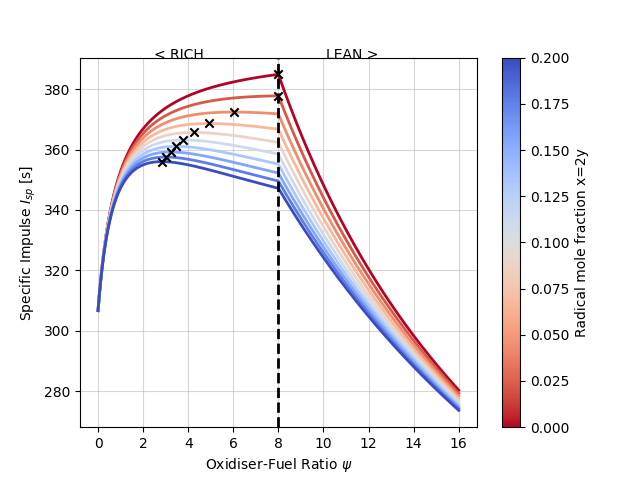

In [10]:
fig=plt.figure()


for x in np.linspace(0,x_asymp,10):
    xpr = TP(psi_v,x,x)*x/TP(8,0,0)

    data = Isp(psi_v,xpr,2*xpr)
    i = np.where(data==np.nanmax(data))[0]
    print("x=y=%.03f: Max Isp = %.0f s at psi=%.2f" % (x,data[i],psi_v[i]))
    plt.plot(psi_v,data,label='x=y=%.03f' % x,c=cfun(x),lw=2)
    plt.scatter(psi_v[i],data[i],marker='x',c='k',zorder=99)#c=cfun(x))
        
plt.axvline(8,lw=2,c='k',ls='--')
plt.grid(alpha=.5)
plt.xlabel(r'Oxidiser-Fuel Ratio $\psi$');
plt.ylabel(r'Specific Impulse $I_{sp}$ [s]')
plt.text(2.5,390,"< RICH");
plt.text(10.1,390,"LEAN >");

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=x_asymp))
cb = plt.colorbar(sm,ax=plt.gca())
cb.set_label('Radical mole fraction x=2y')
plt.savefig('MAE3405_wk12_fig3.png');

In [17]:
# Calculation of Isp
psi_vals = np.array([3,6,8,10])
print ('psi=',psi_vals)
print('T_P=',TP(psi_vals,0,0))
print('MwtP=',MwtP(psi_vals,0,0))
print('Isp=',Isp(psi_vals,0,0))
print('CpP=',CpP(psi_vals,0,0))
print('H=',CpP(psi_vals,0,0)*TP(psi_vals,0,0)*0.51252)

psi= [ 3  6  8 10]
T_P= [1646.0463022  3015.25334951 3928.05804771 3492.99639163]
MwtP= [ 8.         14.         18.         19.55555556]
Isp= [373.74814337 382.38504621 384.90691166 348.23065763]
CpP= [7.96758333 4.55290476 3.54114815 3.25946591]
H= [6721.70548043 7035.95724656 7129.06888097 5835.19531884]
